In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline


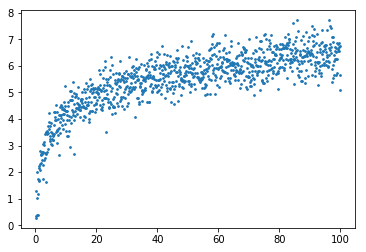

In [2]:
### CHALLENGE 1 ####
npoints = 1000
x = np.linspace(start=0.1, stop=100,num=npoints)
y = np.random.uniform(low = 1, high=2) + \
    np.log(x) + \
    np.random.normal(0, 0.5, npoints) 


plt.scatter(x,y, s=3);

In [3]:
# Linear model
# the answer to a question no one asked
X = np.vstack((np.ones_like(x), x)).T

model = sm.OLS(y, X)
results = model.fit()
y_pred = results.predict(X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1602.
Date:                Tue, 16 Oct 2018   Prob (F-statistic):          9.19e-210
Time:                        21:02:47   Log-Likelihood:                -1035.1
No. Observations:                1000   AIC:                             2074.
Df Residuals:                     998   BIC:                             2084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9865      0.043     92.359      0.000       3.902       4.071
x1             0.0299      0.001     40.031      0.000       0.028       0.031
==============================================================================
Omnibus:                      243.679   Durbin-Watson:                   0.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.218
Skew:                          -1.157   Prob(JB):                    3.19e-181
Kurtosis:                       6.821   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Linear model')

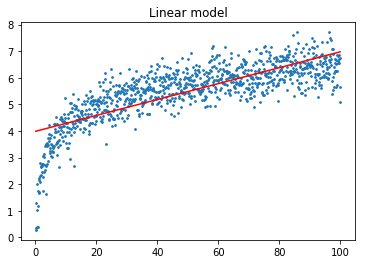

In [4]:
plt.scatter(x, y, s=3)
plt.plot(x, y_pred, c='r');
plt.title("Linear model")

In [5]:
# quadratic model
# 3 predictors
# constant, x, x^2

square_feature = X[:,1]**2
X2 = np.hstack((X, square_feature.reshape(npoints, 1)))

model = sm.OLS(y, X2)
results = model.fit()
y_pred = results.predict(X2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1340.
Date:                Tue, 16 Oct 2018   Prob (F-statistic):          2.77e-283
Time:                        21:02:48   Log-Likelihood:                -861.42
No. Observations:                1000   AIC:                             1729.
Df Residuals:                     997   BIC:                             1744.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1587      0.055     57.942      0.000       3.052       3.266
x1             0.0795      0.003     31.596      0.000       0.075       0.084
x2            -0.0005   2.43e-05    -20.352      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      110.374   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.772
Skew:                          -0.639   Prob(JB):                     1.57e-54
Kurtosis:                       5.076   Cond. No.                     1.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5,1,'Quadratic model')

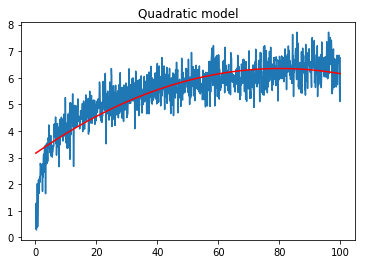

In [6]:
plt.plot(x, y)
plt.plot(x, y_pred, c='r');
plt.title("Quadratic model")

In [7]:
# log model
# 2 predictors: constant, log x

Xlog = np.vstack((np.ones_like(x), np.log(x))).T

model = sm.OLS(y, Xlog)
results = model.fit()
y_pred = results.predict(Xlog)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4221.
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        21:02:48   Log-Likelihood:                -686.85
No. Observations:                1000   AIC:                             1378.
Df Residuals:                     998   BIC:                             1388.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8589      0.058     32.147      0.000       1.745       1.972
x1             1.0041      0.015     64.968      0.000       0.974       1.034
==============================================================================
Omnibus:                        0.725   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.694
Skew:                          -0.064   Prob(JB):                        0.707
Kurtosis:                       3.006   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Log model')

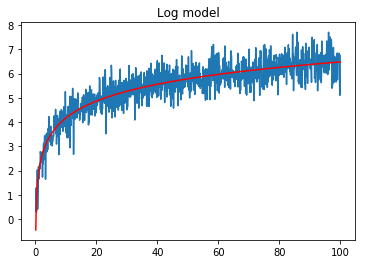

In [8]:
plt.plot(x, y)
plt.plot(x, y_pred, c='r');
plt.title("Log model")

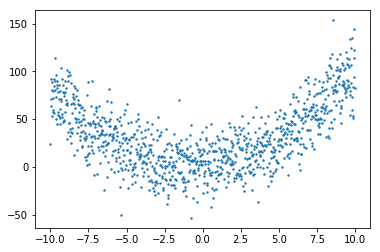

In [9]:
### CHALLENGE 2 ####
npoints = 1001

x = np.linspace(start=-10, stop=10,num=npoints)
y = np.random.uniform(low = 1, high=2) + \
    np.random.uniform(low = 1, high=2) * x + \
    np.random.uniform(low = 0.75, high=1.25) * x**2 + \
    np.random.normal(0, 20, npoints) 

plt.scatter(x,y,s=2);

In [10]:
from sklearn.model_selection import train_test_split

X = x.reshape(npoints,1)

X2 = np.hstack((np.ones(npoints).reshape(npoints,1), 
                x.reshape(npoints,1),
                (x**2).reshape(npoints, 1)))
               
X2df = pd.DataFrame(X2)

X_train, X_test, y_train, y_test = train_test_split(X2df, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     705.0
Date:                Tue, 16 Oct 2018   Prob (F-statistic):          5.28e-177
Time:                        21:02:48   Log-Likelihood:                -3524.5
No. Observations:                 800   AIC:                             7055.
Df Residuals:                     797   BIC:                             7069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              2.4105      1.056      2.284      0.023       0.338       4.482
1              1.0680      0.121      8.808      0.000       0.830       1.306
2              0.8609      0.024     36.621      0.000       0.815       0.907
==============================================================================
Omnibus:                        0.872   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.726
Skew:                          -0.020   Prob(JB):                        0.696
Kurtosis:                       3.142   Cond. No.                         67.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

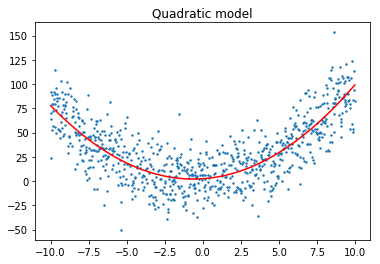

In [11]:
def doplot(X_train, y_train, results, label):
    plotdf = X_train.copy()
    plotdf['y']=y_train

    sortdf = plotdf.sort_index()
    nrows, ncols = sortdf.shape
    colarray = list(range(ncols-1))
    y_pred = results.predict(sortdf[colarray])
    
    if ncols > 2:
        plt.scatter(sortdf[[1]], sortdf[['y']], s=2)
        plt.plot(sortdf[[1]], y_pred, c='r');
        plt.title(label);
    plt.show()
    
    return y_pred
    
doplot(X_train, y_train, results, "Quadratic model");

In [12]:
y_train_pred = results.predict(X_train)
print ("Training mean squared error: %.6f" % mean_squared_error(y_pred=y_train_pred, y_true=y_train))


Training mean squared error: 392.851466


In [13]:
y_test_pred = results.predict(X_test)
print ("Test mean squared error: %.6f" % mean_squared_error(y_pred=y_test_pred, y_true=y_test))


Test mean squared error: 408.111799


Degree 0 model
1 predictors
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 16 Oct 2018   Prob (F-statistic):                nan
Time:                        21:02:48   Log-Likelihood:                -3931.9
No. Observations:                 800   AIC:                             7866.
Df Residuals:                     799   BIC:                             7871.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             31.2522   

/Users/druce/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


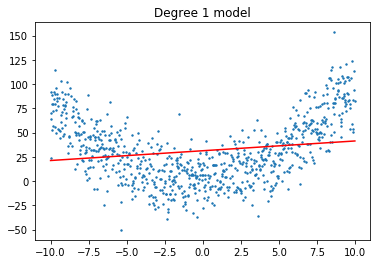

Training mean squared error: 1053.883636
Test mean squared error: 1182.072688
Degree 2 model
3 predictors
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     705.0
Date:                Tue, 16 Oct 2018   Prob (F-statistic):          5.28e-177
Time:                        21:02:49   Log-Likelihood:                -3524.5
No. Observations:                 800   AIC:                             7055.
Df Residuals:                     797   BIC:                             7069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

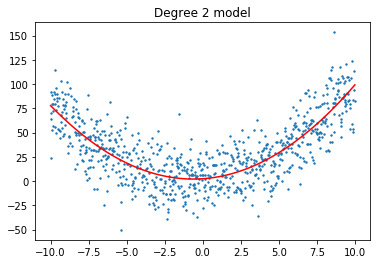

Training mean squared error: 392.851466
Test mean squared error: 408.111799
Degree 3 model
4 predictors
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     469.7
Date:                Tue, 16 Oct 2018   Prob (F-statistic):          1.36e-175
Time:                        21:02:49   Log-Likelihood:                -3524.4
No. Observations:                 800   AIC:                             7057.
Df Residuals:                     796   BIC:                             7075.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

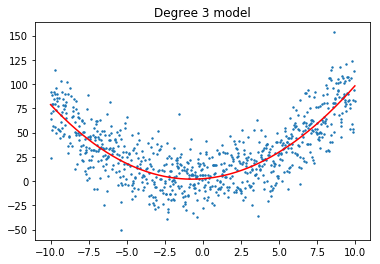

Training mean squared error: 392.702996
Test mean squared error: 410.696170
Degree 4 model
5 predictors
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     352.1
Date:                Tue, 16 Oct 2018   Prob (F-statistic):          2.72e-174
Time:                        21:02:49   Log-Likelihood:                -3524.2
No. Observations:                 800   AIC:                             7058.
Df Residuals:                     795   BIC:                             7082.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

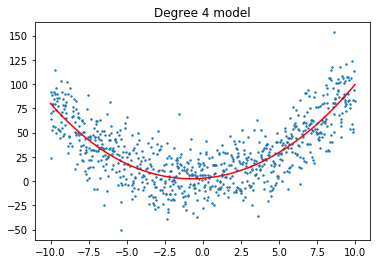

Training mean squared error: 392.540451
Test mean squared error: 409.895658
Degree 5 model
6 predictors
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     281.9
Date:                Tue, 16 Oct 2018   Prob (F-statistic):          3.24e-173
Time:                        21:02:49   Log-Likelihood:                -3523.7
No. Observations:                 800   AIC:                             7059.
Df Residuals:                     794   BIC:                             7087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

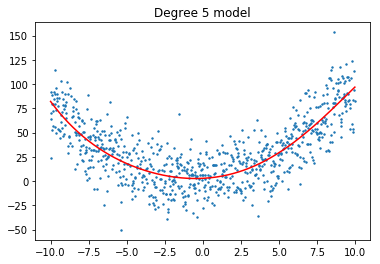

Training mean squared error: 392.028374
Test mean squared error: 412.655504
Degree 6 model
7 predictors
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     237.1
Date:                Tue, 16 Oct 2018   Prob (F-statistic):          3.90e-173
Time:                        21:02:49   Log-Likelihood:                -3521.0
No. Observations:                 800   AIC:                             7056.
Df Residuals:                     793   BIC:                             7089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

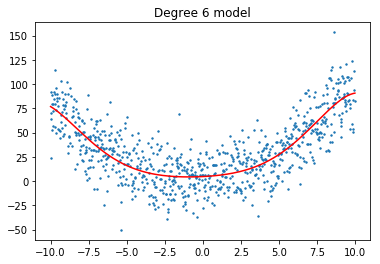

Training mean squared error: 389.373700
Test mean squared error: 420.995825
Degree 7 model
8 predictors
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     204.2
Date:                Tue, 16 Oct 2018   Prob (F-statistic):          1.42e-172
Time:                        21:02:50   Log-Likelihood:                -3519.5
No. Observations:                 800   AIC:                             7055.
Df Residuals:                     792   BIC:                             7092.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

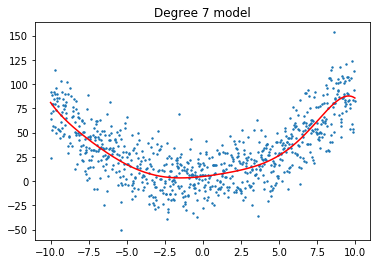

Training mean squared error: 387.912900
Test mean squared error: 424.654341


In [14]:
training_errors = []
test_errors = []

for i in range(8):
    
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)
    rows, cols = X_poly.shape

    print("================================================================================")
    print("Degree %d model" % i)
    print("%d predictors" % cols)
    print("================================================================================")
    
    X_poly_df = pd.DataFrame(X_poly)

    X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)

    model = sm.OLS(y_train, X_train)
    results = model.fit()
    print(results.summary())

    doplot(X_train, y_train, results, "Degree %d model" % i)    

    y_train_pred = results.predict(X_train)
    train_mse = mean_squared_error(y_pred=y_train_pred, y_true=y_train)
    print ("Training mean squared error: %.6f" % train_mse)
    training_errors.append(train_mse)
    y_test_pred = results.predict(X_test)
    test_mse = mean_squared_error(y_pred=y_test_pred, y_true=y_test)
    print ("Test mean squared error: %.6f" % test_mse )
    test_errors.append(test_mse)
    
    print("================================================================================")


In [15]:
# still pretty good test performance
# at first, large training error, similar test error
# then smaller training error, similar test error
# then
#  - training error keeps going down
#  - test error starts creeping up (a little, most of the time)

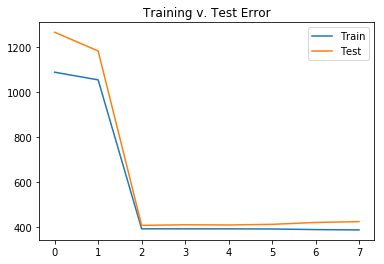

In [16]:
plt.plot(range(8), training_errors, label="Train")
plt.plot(range(8), test_errors, label="Test" );
plt.title("Training v. Test Error")
plt.legend(loc='upper right');

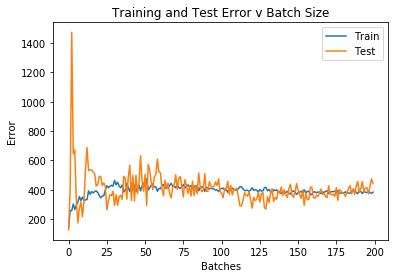

In [17]:
training_errors = []
test_errors = []

X = x.reshape(npoints,1)

X2 = np.hstack((np.ones(npoints).reshape(npoints,1), 
                x.reshape(npoints,1),
                (x**2).reshape(npoints, 1)))


for learning_size in range(5,1001,5):
    X2df = pd.DataFrame(X2)[:learning_size]
    y_learn = y[:learning_size]
    X_train, X_test, y_train, y_test = train_test_split(X2df, y_learn, test_size=0.2, random_state=42)

    model = sm.OLS(y_train, X_train)
    results = model.fit()
    
    y_train_pred = results.predict(X_train)
    train_mse = mean_squared_error(y_pred=y_train_pred, y_true=y_train)
    training_errors.append(train_mse)
    
    y_test_pred = results.predict(X_test)
    test_mse = mean_squared_error(y_pred=y_test_pred, y_true=y_test)
    test_errors.append(test_mse)
    
plt.plot(range(len(training_errors)), training_errors, label = 'Train')
plt.plot(range(len(test_errors)), test_errors, label = "Test");
plt.title("Training and Test Error v Batch Size")
plt.xlabel("Batches")
plt.ylabel("Error")
plt.legend(loc='upper right');